In [419]:
import pandas as pd
import scipy as sp
path = "./데이터/"

In [420]:
df = pd.read_excel("./데이터/전체자료_관공서인프라신사동수정.xlsx")
df.columns

Index(['Unnamed: 0', 'GU_NAME', 'ADM_NM', '동면적(k㎡)', '인구수', '인구밀도(명/km²)',
       '동단위우량', '동단위시우량', '침수횟수', '경사도', '양호비율', '도로_건물_면적_비율', '녹지_면적_비율',
       '제방', '수문', '암거', '구난시설', '노후건물개수', '행정동_코드', '월평균소득', '분기평균총지출',
       '고령자비율', '장애인비율', '행정동코드', '면적', '지하건물', '빗물펌프장까지의거리'],
      dtype='object')

In [421]:
df["침수여부"] = df["침수횟수"].apply(lambda x: 1 if x > 0 else 0)

In [422]:
df = df.loc[df['침수횟수'] >0]
df

,Unnamed: 0,GU_NAME,ADM_NM,동면적(k㎡),인구수,인구밀도(명/km²),동단위우량,동단위시우량,침수횟수,경사도,...,행정동_코드,월평균소득,분기평균총지출,고령자비율,장애인비율,행정동코드,면적,지하건물,빗물펌프장까지의거리,침수여부
2,2,종로구,부암동,2.27,9460,4167.400881,16.725406,0.699515,2,0.314583,...,11110550,3.662519e+06,1.315638e+09,0.190227,0.032613,1101055,2.27,813,5699.673727,1
3,3,종로구,평창동,8.87,17743,2000.338219,65.354340,2.733348,2,0.229615,...,11110560,4.546270e+06,2.483992e+09,0.195711,0.027495,1101056,8.87,1797,5465.810242,1
5,5,종로구,가회동,0.54,4084,7562.962963,3.978731,0.166404,1,0.097500,...,11110600,3.500749e+06,1.877657e+09,0.206642,0.042804,1101060,0.54,486,3972.557785,1
6,6,종로구,이화동,0.78,7651,9808.974359,5.747056,0.240362,1,0.078333,...,11110640,3.053665e+06,8.197177e+09,0.177958,0.040886,1101064,0.78,772,2490.998419,1
7,7,종로구,혜화동,1.12,19570,17473.214290,8.252183,0.345135,1,0.078333,...,11110650,3.356261e+06,7.919489e+09,0.138304,0.029755,1101073,1.12,1428,3300.974941,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,401,강동구,성내2동,0.67,23414,34946.268660,5.893320,0.239663,19,0.055000,...,11740650,2.835743e+06,6.693598e+09,0.189944,0.038805,1125066,0.67,1326,909.339214,1
402,402,강동구,성내3동,0.71,22984,32371.830990,6.245160,0.253972,12,0.072143,...,11740660,2.922979e+06,6.422163e+09,0.177626,0.000130,1125067,0.71,788,1179.328824,1
403,403,강동구,길동,1.61,45225,28090.062110,14.161560,0.575907,9,0.176154,...,11740685,2.870842e+06,1.120701e+10,0.186847,0.036607,1125074,1.61,1319,1960.757507,1
404,404,강동구,둔촌1동,0.92,74,80.434783,8.092320,0.329090,3,0.151786,...,11740690,3.596221e+06,2.439333e+07,0.150685,12.671233,1125070,0.92,6,1646.603436,1


In [423]:
# df=df.drop(
#     columns=[
#         "Unnamed: 0",
#         "GU_NAME",
#         "ADM_NM",
#         "동면적(k㎡)",
#         "인구수",
#         "인구밀도(명/km²)",
#         "동단위우량",
#         "동단위시우량",
#         "병원",
#         "경찰",
#         "소방서",
#         "행정동_코드",
#         "월평균소득",
#         "분기평균총지출",
#         "고령자비율",
#         "장애인비율",
#         "행정동코드",
#         "면적",
#         "침수횟수"
#     ],
#     axis=1,
# )

In [424]:
df = df.drop(
    columns=[
        "Unnamed: 0",
        "ADM_NM",
        "동면적(k㎡)",
        "인구수",
        "동단위우량",
        "동단위시우량",
        "구난시설",
        "행정동_코드",
        "월평균소득",
        "분기평균총지출",
        "고령자비율",
        "장애인비율",
        "행정동코드",
        "면적"
    ],
    axis=1,
)

In [425]:
# df = df.drop(
#     columns=[
#         "Unnamed: 0",
#         "ADM_NM",
#         "동면적(k㎡)",
#         "인구수",
#         "행정동_코드",
#         "행정동코드",
#         "면적",
#         "침수횟수",
#     ],
#     axis=1,
# )

In [426]:
# df = df.drop(
#     columns=[
#         "Unnamed: 0",
#         "ADM_NM",
#         "동면적(k㎡)",
#         "인구수",
#         "행정동_코드",
#         "행정동코드",
#         "면적"
#     ],
#     axis=1,
# )

In [427]:
path3 = path + "서울시_강우량_정보_2022년/"
rain_dict = {}
for i in range(1, 13):
    rain_dict[i] = pd.read_csv(path3 + f"서울시_강우량_정보_2022년{i}월.csv", encoding="euc-kr")
rain_data = pd.concat([rain_dict[i][rain_dict[i]["10분우량"] != 0] for i in range(1, 13)])
rain_agg = rain_data.groupby(["구청명"])["10분우량"].agg(["sum"])

In [428]:
rain_agg.reset_index(inplace=True)

In [429]:
rain_agg.rename(columns={"구청명": "GU_NAME","sum":"강수량"}, inplace=True)
rain_agg

,GU_NAME,강수량
0,강남구,5187.0
1,강동구,3426.5
2,강북구,1803.5
3,강서구,2690.5
4,관악구,3461.0
5,광진구,1887.0
6,구로구,3246.5
7,금천구,3270.0
8,노원구,3290.5
9,도봉구,1932.0


In [430]:
df = pd.merge(df,rain_agg, on="GU_NAME")

In [431]:
df.drop("GU_NAME",axis=1,inplace=True)

In [432]:
df

,인구밀도(명/km²),침수횟수,경사도,양호비율,도로_건물_면적_비율,녹지_면적_비율,제방,수문,암거,노후건물개수,지하건물,빗물펌프장까지의거리,침수여부,강수량
0,4167.400881,2,0.314583,0.906250,0.147000,0.225413,40,3,40,972,813,5699.673727,1,2953.5
1,2000.338219,2,0.229615,0.974132,0.087765,0.164587,83,20,171,1331,1797,5465.810242,1,2953.5
2,7562.962963,1,0.097500,0.676056,0.371271,0.128063,5,0,30,239,486,3972.557785,1,2953.5
3,9808.974359,1,0.078333,0.969072,0.393989,0.133864,1,0,74,576,772,2490.998419,1,2953.5
4,17473.214290,1,0.078333,0.942857,0.382785,0.125391,3,0,107,1111,1428,3300.974941,1,2953.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,34946.268660,19,0.055000,0.886957,0.510793,0.005971,0,0,12,1164,1326,909.339214,1,3426.5
262,32371.830990,12,0.072143,0.633929,0.438031,0.005765,0,0,17,425,788,1179.328824,1,3426.5
263,28090.062110,9,0.176154,0.608911,0.358275,0.059004,4,0,21,892,1319,1960.757507,1,3426.5
264,80.434783,3,0.151786,0.738636,0.229434,0.045133,0,0,9,11,6,1646.603436,1,3426.5


In [433]:
# correlation_matrix = df.corr()
# correlation_with_flooding = correlation_matrix["침수횟수"]

In [434]:
df

,인구밀도(명/km²),침수횟수,경사도,양호비율,도로_건물_면적_비율,녹지_면적_비율,제방,수문,암거,노후건물개수,지하건물,빗물펌프장까지의거리,침수여부,강수량
0,4167.400881,2,0.314583,0.906250,0.147000,0.225413,40,3,40,972,813,5699.673727,1,2953.5
1,2000.338219,2,0.229615,0.974132,0.087765,0.164587,83,20,171,1331,1797,5465.810242,1,2953.5
2,7562.962963,1,0.097500,0.676056,0.371271,0.128063,5,0,30,239,486,3972.557785,1,2953.5
3,9808.974359,1,0.078333,0.969072,0.393989,0.133864,1,0,74,576,772,2490.998419,1,2953.5
4,17473.214290,1,0.078333,0.942857,0.382785,0.125391,3,0,107,1111,1428,3300.974941,1,2953.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,34946.268660,19,0.055000,0.886957,0.510793,0.005971,0,0,12,1164,1326,909.339214,1,3426.5
262,32371.830990,12,0.072143,0.633929,0.438031,0.005765,0,0,17,425,788,1179.328824,1,3426.5
263,28090.062110,9,0.176154,0.608911,0.358275,0.059004,4,0,21,892,1319,1960.757507,1,3426.5
264,80.434783,3,0.151786,0.738636,0.229434,0.045133,0,0,9,11,6,1646.603436,1,3426.5


In [435]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, KFold, cross_validate
import seaborn as sb
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans


MinMaxScaler = MinMaxScaler()
scale_df = MinMaxScaler.fit_transform(df)

In [436]:
sca_df = pd.DataFrame(data=scale_df, columns=df.columns)
sca_df

,인구밀도(명/km²),침수횟수,경사도,양호비율,도로_건물_면적_비율,녹지_면적_비율,제방,수문,암거,노후건물개수,지하건물,빗물펌프장까지의거리,침수여부,강수량
0,0.082150,0.001138,0.770108,0.905668,0.167866,0.281813,0.087912,0.025424,0.062003,0.323755,0.255461,0.734566,0.0,0.378893
1,0.038591,0.001138,0.558745,0.973971,0.068699,0.205517,0.182418,0.169492,0.270270,0.443702,0.566952,0.703668,0.0,0.378893
2,0.150403,0.000000,0.230100,0.674044,0.543326,0.159705,0.010989,0.000000,0.046105,0.078851,0.151947,0.506384,0.0,0.378893
3,0.195549,0.000000,0.182421,0.968880,0.581359,0.166981,0.002198,0.000000,0.116057,0.191447,0.242482,0.310644,0.0,0.378893
4,0.349604,0.000000,0.182421,0.942502,0.562603,0.156353,0.006593,0.000000,0.168521,0.370197,0.450142,0.417656,0.0,0.378893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.700821,0.020478,0.124378,0.886254,0.776905,0.006560,0.000000,0.000000,0.017488,0.387905,0.417854,0.101679,0.0,0.510428
262,0.649073,0.012514,0.167022,0.631655,0.655091,0.006302,0.000000,0.000000,0.025437,0.140996,0.247547,0.137349,0.0,0.510428
263,0.563008,0.009101,0.425756,0.606482,0.521569,0.073081,0.008791,0.000000,0.031797,0.297026,0.415638,0.240590,0.0,0.510428
264,0.000000,0.002275,0.365139,0.737013,0.305872,0.055683,0.000000,0.000000,0.012719,0.002673,0.000000,0.199084,0.0,0.510428


C:\Users\yis82\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yis82\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yis82\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yis82\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yis82\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) miss

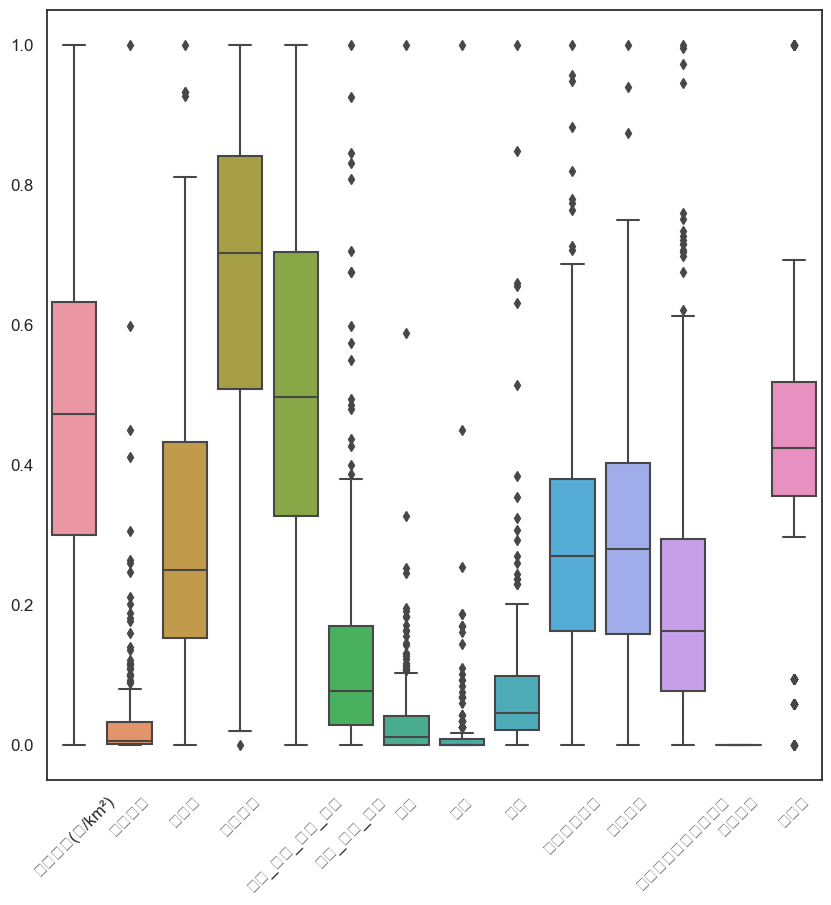

In [437]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
plt.xticks(rotation=45)  # Corrected the typo here
sns.boxplot(data=sca_df)  # Corrected the library name here

plt.show()

In [438]:
# from scipy.stats import ttest_ind

# # Assuming you have a DataFrame with a '침수여부' column and other numeric columns for the variables you want to compare
# # Replace '침수여부' with the actual column name in your DataFrame

# categorical_column = "침수여부"

# # Iterate through numeric columns
# for numeric_column in df.select_dtypes(include="number").columns:
#     if numeric_column != categorical_column:
#         group1 = sca_df[sca_df[categorical_column] == 1][numeric_column]
#         group2 = sca_df[sca_df[categorical_column] == 0][numeric_column]

#         # Perform t-test
#         t_statistic, p_value = ttest_ind(group1, group2, equal_var=False)

#         # Print the results for each column
#         print(f"T-test for {numeric_column}:")
#         print("  T-statistic:", t_statistic)
#         print("  P-value:", p_value)

#         # Check for statistical significance
#         alpha = 0.1
#         if p_value < alpha:
#             print(
#                 "  Reject the null hypothesis. There is a significant difference between groups."
#             )
#         else:
#             print(
#                 "  Fail to reject the null hypothesis. There is no significant difference between groups."
#             )

#         print("\n")

T-test for 인구밀도(명/km²):
  T-statistic: nan
  P-value: nan
  Fail to reject the null hypothesis. There is no significant difference between groups.


T-test for 침수횟수:
  T-statistic: nan
  P-value: nan
  Fail to reject the null hypothesis. There is no significant difference between groups.


T-test for 경사도:
  T-statistic: nan
  P-value: nan
  Fail to reject the null hypothesis. There is no significant difference between groups.


T-test for 양호비율:
  T-statistic: nan
  P-value: nan
  Fail to reject the null hypothesis. There is no significant difference between groups.


T-test for 도로_건물_면적_비율:
  T-statistic: nan
  P-value: nan
  Fail to reject the null hypothesis. There is no significant difference between groups.


T-test for 녹지_면적_비율:
  T-statistic: nan
  P-value: nan
  Fail to reject the null hypothesis. There is no significant difference between groups.


T-test for 제방:
  T-statistic: nan
  P-value: nan
  Fail to reject the null hypothesis. There is no significant difference between g

In [439]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Assuming '침수여부' is the target variable, and other columns are features
# features = sca_df.drop(["침수여부"], axis=1)
# target = sca_df["침수여부"]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     features, target, test_size=0.2, random_state=42
# )

# # Create a Logistic Regression model
# model = LogisticRegression()

# # Train the model
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# # Create a heatmap for the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(
#     conf_matrix,
#     annot=True,
#     fmt="d",
#     cmap="Blues",
#     cbar=False,
#     xticklabels=["Not Flooded", "Flooded"],
#     yticklabels=["Not Flooded", "Flooded"],
# )
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

# # Print the results
# print(f"Accuracy: {accuracy:.2f}")
# print(f"Classification Report:\n{classification_rep}")

In [440]:
df.columns

Index(['인구밀도(명/km²)', '침수횟수', '경사도', '양호비율', '도로_건물_면적_비율', '녹지_면적_비율', '제방',
       '수문', '암거', '노후건물개수', '지하건물', '빗물펌프장까지의거리', '침수여부', '강수량'],
      dtype='object')

In [441]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.feature_selection import RFE
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import mean_squared_error, r2_score

# # Assuming X and y are your feature matrix and target variable
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # Create a linear regression model
# model = LinearRegression()

# # Use RFE for feature selection
# rfe = RFE(model, n_features_to_select=8)
# X_train_selected = rfe.fit_transform(X_train, y_train)
# X_test_selected = rfe.transform(X_test)

# # Train the model with the selected features
# model.fit(X_train_selected, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test_selected)

# # Evaluate the model using regression metrics
# mse = mean_squared_error(y_test, y_pred)
# r_squared = r2_score(y_test, y_pred)

# # Print the evaluation metrics
# print(f"Mean Squared Error: {mse:.2f}")
# print(f"R-squared: {r_squared:.2f}")


Mean Squared Error: 0.21
R-squared: 0.07


In [453]:
sca_df['침수횟수'] = df['침수횟수']

In [456]:

sca_df =sca_df.drop("침수여부", axis=1)

In [460]:
sca_df

,인구밀도(명/km²),침수횟수,경사도,양호비율,도로_건물_면적_비율,녹지_면적_비율,제방,수문,암거,노후건물개수,지하건물,빗물펌프장까지의거리,강수량
0,0.082150,2,0.770108,0.905668,0.167866,0.281813,0.087912,0.025424,0.062003,0.323755,0.255461,0.734566,0.378893
1,0.038591,2,0.558745,0.973971,0.068699,0.205517,0.182418,0.169492,0.270270,0.443702,0.566952,0.703668,0.378893
2,0.150403,1,0.230100,0.674044,0.543326,0.159705,0.010989,0.000000,0.046105,0.078851,0.151947,0.506384,0.378893
3,0.195549,1,0.182421,0.968880,0.581359,0.166981,0.002198,0.000000,0.116057,0.191447,0.242482,0.310644,0.378893
4,0.349604,1,0.182421,0.942502,0.562603,0.156353,0.006593,0.000000,0.168521,0.370197,0.450142,0.417656,0.378893
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.700821,19,0.124378,0.886254,0.776905,0.006560,0.000000,0.000000,0.017488,0.387905,0.417854,0.101679,0.510428
262,0.649073,12,0.167022,0.631655,0.655091,0.006302,0.000000,0.000000,0.025437,0.140996,0.247547,0.137349,0.510428
263,0.563008,9,0.425756,0.606482,0.521569,0.073081,0.008791,0.000000,0.031797,0.297026,0.415638,0.240590,0.510428
264,0.000000,3,0.365139,0.737013,0.305872,0.055683,0.000000,0.000000,0.012719,0.002673,0.000000,0.199084,0.510428


In [457]:
pca = PCA()
pca.fit_transform(sca_df)

array([[-3.07791176e+01,  7.54677000e-01, -3.32275463e-01, ...,
        -1.03336331e-02,  6.37887076e-02,  4.18138361e-02],
       [-3.07791065e+01,  7.45671441e-01, -4.22627142e-01, ...,
         4.24844129e-02, -9.94559938e-02, -1.29139637e-02],
       [-3.17784441e+01,  2.01054560e-01,  1.17541822e-01, ...,
        -1.88643327e-02, -5.47108884e-02,  1.18020864e-03],
       ...,
       [-2.37780842e+01, -1.00532403e-01, -9.83494004e-02, ...,
        -3.36694721e-02, -6.35914827e-02,  1.54774865e-02],
       [-2.97786454e+01,  3.97678491e-01,  3.14829612e-01, ...,
        -1.92694935e-02, -1.71861003e-02,  2.38372446e-02],
       [-2.27785812e+01,  3.08204637e-01,  2.39710918e-02, ...,
        -3.13215982e-02, -1.35969243e-02,  1.07895645e-03]])

In [458]:
pca.explained_variance_ratio_

array([9.99940229e-01, 1.80603551e-05, 1.11175758e-05, 8.51167292e-06,
       5.94149580e-06, 4.14284854e-06, 3.53323181e-06, 3.08719086e-06,
       1.90078337e-06, 1.73576178e-06, 7.62371901e-07, 6.65762560e-07,
       3.12256323e-07])

In [459]:
import numpy as np
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.99994023, 0.99995829, 0.99996941, 0.99997792, 0.99998386,
       0.999988  , 0.99999154, 0.99999462, 0.99999652, 0.99999826,
       0.99999902, 0.99999969, 1.        ])

C:\Users\yis82\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:93: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
C:\Users\yis82\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\yis82\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\yis82\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from current font.
  func(*args, **kwargs)
C:\Users\yis82\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:93: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\yis82\AppData\Roaming\Python\Python39\

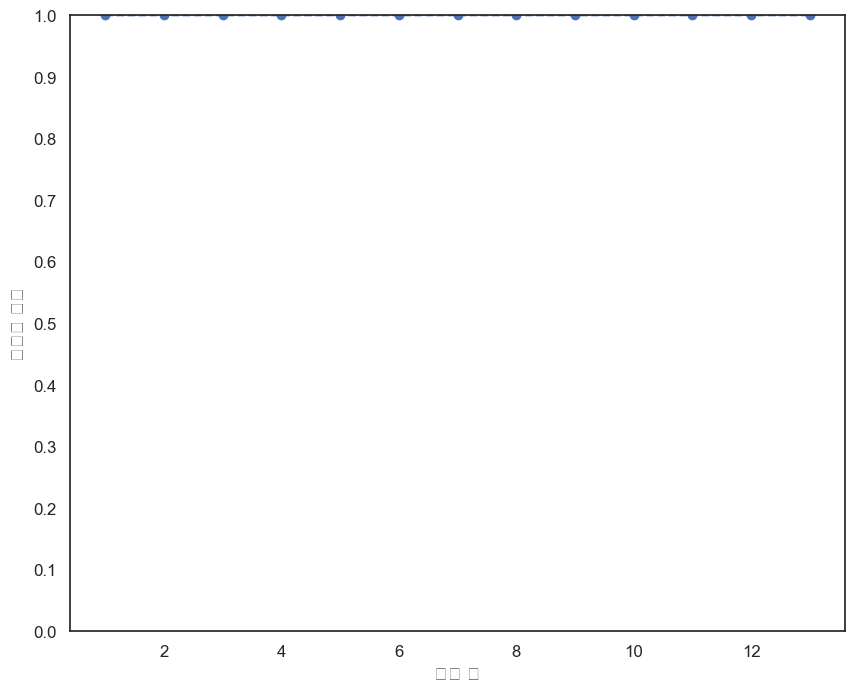

In [462]:
import platform

plt.figure(figsize=(10, 8))

plt.plot(
    range(1, 14), pca.explained_variance_ratio_.cumsum(), marker="o", linestyle="--"
)
plt.yticks([i / 10 for i in range(11)])
plt.ylabel("설명된 분산")


plt.xlabel("차원 수")
plt.yticks

plt.rc("font", family="Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False  # 한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [464]:
pca_2 = PCA(n_components=2)
pca_2.fit(sca_df)

PCA(n_components=2)

In [465]:
pca_2_result = pca_2.fit_transform(sca_df)

In [466]:
results = pd.DataFrame(
    data=pca_2.fit_transform(sca_df),
    columns=["PC-1", "PC-2"],
)

In [467]:
# 결과 출력
components_df = pd.DataFrame(
    pca_2.components_, columns=sca_df.columns, index=results.columns
)
components_df

,인구밀도(명/km²),침수횟수,경사도,양호비율,도로_건물_면적_비율,녹지_면적_비율,제방,수문,암거,노후건물개수,지하건물,빗물펌프장까지의거리,강수량
PC-1,0.000401,0.999999,-0.000273,-0.000536,0.000784,-0.000186,-0.000086,-0.000008,-0.000137,0.000131,0.000252,-0.000465,-0.000018
PC-2,-0.490556,0.001169,0.321040,0.286679,-0.591497,0.240349,0.097018,0.062894,0.151461,-0.143551,-0.147480,0.292427,0.047813


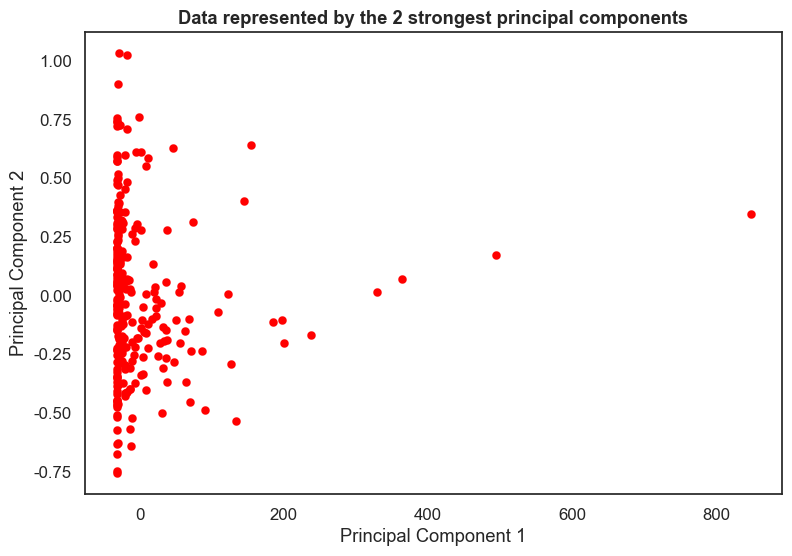

In [468]:
sb.set(style="white", rc={"figure.figsize": (9, 6)}, font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], color="red", lw=0.1)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Data represented by the 2 strongest principal components", fontweight="bold")
plt.show()

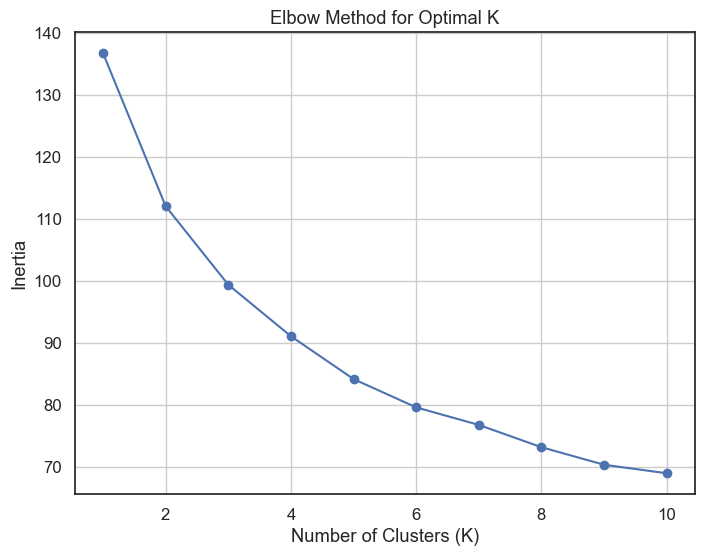

In [ ]:
inertia = []

# Define the range of K values to test
k_range = range(1, 11)  # You can adjust this range based on your problem

# Calculate the inertia for different K values
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(sca_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()
plt.close()

In [ ]:
inertia = []
for i in range(2, 10):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", n_init=15, max_iter=500, random_state=17
    )
    kmeans.fit(sca_df)
    inertia.append(kmeans.inertia_)

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


silhouette = {}
for i in range(2, 10):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", n_init=100, max_iter=500, random_state=17
    )
    kmeans.fit(sca_df)
    silhouette[i] = silhouette_score(sca_df, kmeans.labels_, metric="euclidean")

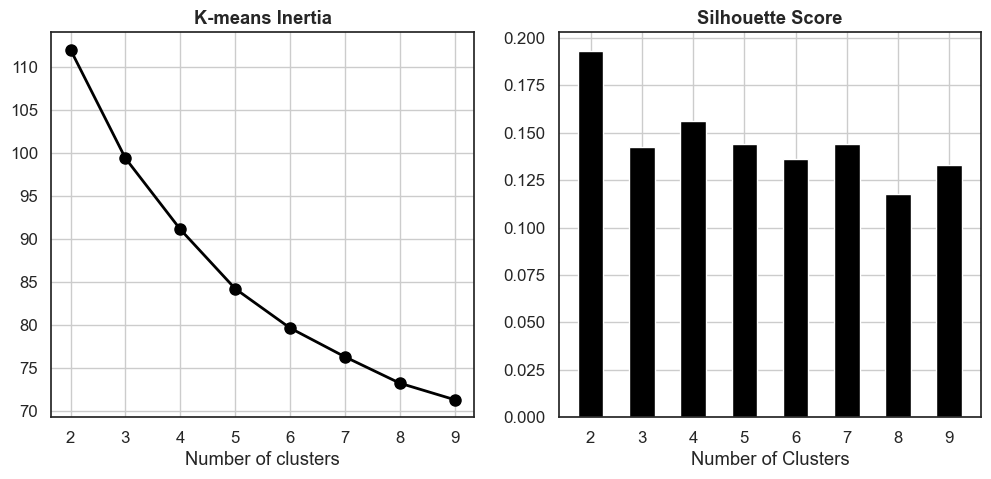

In [ ]:
sb.set(style="white", font_scale=1.1, rc={"figure.figsize": (12, 5)})

plt.subplot(1, 2, 1)

plt.plot(range(2, len(inertia) + 2), inertia, marker="o", lw=2, ms=8, color="black")
plt.xlabel("Number of clusters")
plt.title("K-means Inertia", fontweight="bold")
plt.grid(True)

plt.subplot(1, 2, 2)

plt.bar(
    range(len(silhouette)),
    list(silhouette.values()),
    align="center",
    color="black",
    width=0.5,
)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title("Silhouette Score", fontweight="bold")
plt.xlabel("Number of Clusters")


plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(
    sca_df[
        [
            "배수등급양호비율",
            "제방",
            "수문",
            "평균경사도(%)",
            "하천까지의거리(중심)",
            "인구밀도(명/km²)",
            "도로율",
            "노인_per",
            "장애인_per",
            "기초생활수급자_per",
            "추정면적당시우량(연간)",
            "FREQUENCY",
        ]
    ]
)
y

KeyError: "['배수등급양호비율', '평균경사도(%)', '하천까지의거리(중심)', '도로율', '노인_per', '장애인_per', '기초생활수급자_per', '추정면적당시우량(연간)', 'FREQUENCY'] not in index"

In [ ]:
import sklearn.tree as sktree
import sklearn.preprocessing as skpre
import numpy as np
import sklearn.model_selection as skmod
import matplotlib.pyplot as plt

np.random.seed(10)
plt.rcParams["font.family"] = "Malgun Gothic"

In [ ]:
# feature_cols=['배수등급양호비율', '제방', '수문', '암거', '평균경사도(%)',
#        '하천까지의거리(중심)', '인구밀도(명/km²)', '도로율', '노인_per', '장애인_per', '기초생활수급자_per',
#        '기초생활수급자+65세이상_per', '추정시우량(연간)']
target_cols = ["침수여부"]
feature_cols = sca_df.columns.difference(["GU_NAME", "ADM_NM"] + target_cols)
feature_cols

Index(['강수량', '경사도', '고령자비율', '구난시설', '노후건물개수', '녹지_면적_비율', '도로_건물_면적_비율',
       '동단위시우량', '동단위우량', '분기평균총지출', '빗물펌프장까지의거리', '수문', '암거', '양호비율', '월평균소득',
       '인구밀도(명/km²)', '장애인비율', '제방', '지하건물', '침수횟수'],
      dtype='object')

In [ ]:
train, test = skmod.train_test_split(sca_df, train_size=0.7, random_state=10)

In [ ]:
params_model = sktree.DecisionTreeClassifier(criterion="entropy", random_state=10)
params_model.fit(X=train[feature_cols], y=train[target_cols])

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [ ]:
params_model.score(X=test[feature_cols], y=test[target_cols])

1.0

In [ ]:
print("max_depth :", params_model.get_depth())
print("max_sample_size :", params_model.get_n_leaves())

max_depth : 1
max_sample_size : 2


In [ ]:
plt.figure()
sktree.plot_tree(params_model, filled=True)
plt.savefig("tree.png", dpi=1000, bbox_inches="tight")
plt.close()

In [ ]:
import scipy as sp

In [ ]:
params = {
    "max_depth": sp.stats.randint(low=2, high=12)
}  # ,"min_samples_split":sp.stats.randint(low=2,high=max_sample_size)} minsample 제거
grid_tree = sktree.DecisionTreeClassifier(criterion="entropy", random_state=10)
Random_model = skmod.RandomizedSearchCV(
    grid_tree,
    param_distributions=params,
    cv=3,
    random_state=10,
    n_iter=500,
    n_jobs=-1,
    scoring="accuracy",
)
Random_model.fit(X=sca_df[feature_cols], y=sca_df[target_cols])

RandomizedSearchCV(cv=3,
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    random_state=10),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000277C3B9FBB0>},
                   random_state=10, scoring='accuracy')

In [ ]:
통합_best_params = Random_model.best_params_
print("결과 :", Random_model.best_params_)

결과 : {'max_depth': 3}


In [ ]:
for i in range(40):
    eval(f"np.random.seed({i+1})")

In [ ]:
import sklearn.utils as skuti

acc_list = []
best_params = []
# tree_model=sktree.DecisionTreeClassifier(criterion="entropy",max_depth=sub_best_params["max_depth"]
#                                          ,min_samples_split=sub_best_params["min_samples_split"],
#                                    random_state=10)
for i in range(11, 11 + 40):
    resample_data = skuti.resample(
        sca_df, replace=True, random_state=i, stratify=sca_df[target_cols]
    )  # 학습데이터
    test_data = sca_df.loc[list(set(sca_df.index) - set(resample_data.index))]  # 검증데이터

    # random search
    # params={"max_depth":sp.stats.randint(low=2,high=max_depth),"min_samples_split":sp.stats.randint(low=2,high=max_sample_size)} #수정 ->minsample drop
    params = {"max_depth": sp.stats.randint(low=2, high=12)}
    grid_tree = sktree.DecisionTreeClassifier(criterion="entropy", random_state=10)
    sub_Random_model = skmod.RandomizedSearchCV(
        estimator=grid_tree,
        param_distributions=params,
        scoring="accuracy",
        random_state=10,
        cv=10,
        n_iter=300,
        n_jobs=-1,
    )
    sub_Random_model.fit(X=resample_data[feature_cols], y=resample_data[target_cols])
    tree_model = sub_Random_model.best_estimator_
    # tree_model.fit(X=resample_data[feature_cols],y=resample_data[target_cols]) #학습
    acc_list.append(
        tree_model.score(X=test_data[feature_cols], y=test_data[target_cols])
    )
    best_params.append(sub_Random_model.best_params_)

In [ ]:
나무결과 = pd.DataFrame(acc_list).rename(columns={0: "accuracy"})
나무결과["테스트_오차율"] = 1 - 나무결과["accuracy"]
나무결과.sort_values(by="테스트_오차율", inplace=True)

In [ ]:
best_params

[{'max_depth': 10},
 {'max_depth': 10},
 {'max_depth': 11},
 {'max_depth': 11},
 {'max_depth': 11},
 {'max_depth': 11},
 {'max_depth': 11},
 {'max_depth': 11},
 {'max_depth': 11},
 {'max_depth': 11},
 {'max_depth': 11},
 {'max_depth': 11},
 {'max_depth': 8},
 {'max_depth': 11},
 {'max_depth': 11},
 {'max_depth': 11},
 {'max_depth': 11},
 {'max_depth': 10},
 {'max_depth': 11},
 {'max_depth': 10},
 {'max_depth': 11},
 {'max_depth': 11},
 {'max_depth': 11},
 {'max_depth': 11},
 {'max_depth': 10},
 {'max_depth': 9},
 {'max_depth': 11},
 {'max_depth': 11},
 {'max_depth': 11},
 {'max_depth': 11},
 {'max_depth': 9},
 {'max_depth': 10},
 {'max_depth': 11},
 {'max_depth': 10},
 {'max_depth': 11},
 {'max_depth': 11},
 {'max_depth': 11},
 {'max_depth': 11},
 {'max_depth': 11},
 {'max_depth': 10}]

In [ ]:
나무결과

,accuracy,테스트_오차율
36,0.697531,0.302469
35,0.690141,0.309859
20,0.680000,0.320000
11,0.680000,0.320000
12,0.679245,0.320755
38,0.678571,0.321429
37,0.671053,0.328947
3,0.666667,0.333333
6,0.659864,0.340136
34,0.657534,0.342466


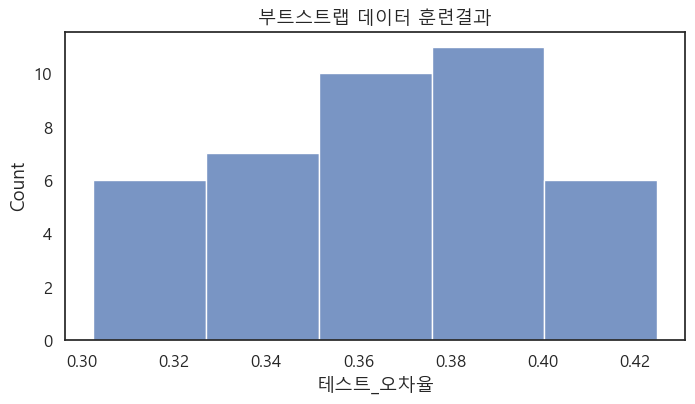

In [ ]:
import seaborn as sb

plt.figure(figsize=(8, 4))
plt.title("부트스트랩 데이터 훈련결과")
sb.histplot(x=나무결과["테스트_오차율"], bins=5)
plt.show()
plt.ylabel("모델 수")
plt.close()

In [ ]:
나무결과["테스트_오차율"].mean()

0.3661409111852592

In [ ]:
sp.stats.ttest_1samp(나무결과["테스트_오차율"], 0.31)

TtestResult(statistic=11.074909425483554, pvalue=1.3140506733242278e-13, df=39)

In [ ]:
final_tree_model = sktree.DecisionTreeClassifier(
    max_depth=Random_model.best_params_["max_depth"]
    # ,min_samples_split=Random_model.best_params_["min_samples_split"]
    ,
    random_state=10,
    criterion="entropy",
)
final_tree_model.fit(X=sca_df[feature_cols], y=sca_df[target_cols])

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=10)

In [ ]:
info_result = pd.DataFrame(
    list(zip(final_tree_model.feature_names_in_, final_tree_model.feature_importances_))
).rename(columns={0: "feature_name", 1: "infomation_gain"})
info_result["infomation_gain"] = info_result["infomation_gain"].apply(lambda x: x * 100)
info_result.sort_values(by="infomation_gain", ascending=False, inplace=True)
info_result.to_csv("./information_gain.csv")

In [ ]:
# info_result
box_col = info_result["feature_name"]
rename_col = [x.replace("_per", "(%)") for x in box_col]
rename_col1 = [x.replace("율(%)", "율") for x in rename_col]
rename_col2 = [x.replace("율", "율(%)") for x in rename_col1]
info_result["feature_name"] = rename_col2
info_result.reset_index(inplace=True)

In [ ]:
info_result[["feature_name", "infomation_gain"]]

,feature_name,infomation_gain
0,강수량,41.165908
1,지하건물,26.471483
2,인구밀도(명/km²),19.428031
3,노후건물개수,12.934579
4,고령자비율(%),0.000000
5,수문,0.000000
6,제방,0.000000
7,장애인비율(%),0.000000
8,월평균소득,0.000000
9,양호비율(%),0.000000


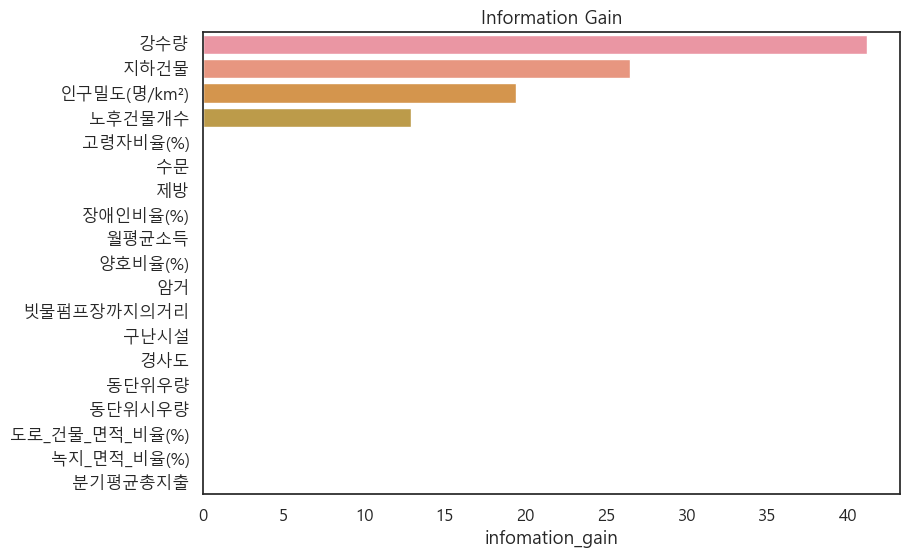

In [ ]:
plt.figure()
ax = sb.barplot(x=info_result["infomation_gain"], y=info_result["feature_name"])
box_col = info_result["feature_name"]
rename_col = [x.replace("_per", "(%)") for x in box_col]
rename_col1 = [x.replace("율(%)", "율") for x in rename_col]
rename_col2 = [x.replace("율", "율(%)") for x in rename_col1]
ax.set_yticklabels(rename_col2)
plt.title("Information Gain")
plt.ylabel("")
plt.show()
plt.close()

In [ ]:
plt.figure()
box_col = final_tree_model.feature_names_in_
rename_col = [x.replace("_per", "(%)") for x in box_col]
rename_col1 = [x.replace("율(%)", "율") for x in rename_col]
rename_col2 = [x.replace("율", "율(%)") for x in rename_col1]
sktree.plot_tree(
    final_tree_model, filled=True, feature_names=rename_col2, proportion=False
)
plt.savefig("final_tree.png", dpi=1000, bbox_inches="tight")
plt.close()